In [1]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt

#BTO Avg Prices on estate/room type 
bto_data = np.genfromtxt('price-range-of-hdb-flats-offered.csv', delimiter=",", skip_header=True,
                      dtype = [('yr','i4'), ('town','U30'),('types','U20'),
                               ('min_price','i4'),('max_price','i4')])
#Remove rows with 0 values 
bto_data = bto_data[bto_data['min_price'] != 0]
print(bto_data)

[(2010, 'Punggol', '3-room', 150000, 237000)
 (2010, 'Punggol', '4-room', 243000, 376000)
 (2010, 'Punggol', '5-room', 330000, 458000)
 (2010, 'Jurong West', '3-room', 168000, 199000)
 (2010, 'Jurong West', '4-room', 239000, 325000)
 (2010, 'Jurong West', '5-room', 298000, 391000)
 (2010, 'Bukit Panjang', '2-room',  83000, 119000)
 (2010, 'Bukit Panjang', '3-room', 143000, 191000)
 (2010, 'Bukit Panjang', '4-room', 226000, 312000)
 (2010, 'Bukit Panjang', '5-room', 298000, 398000)
 (2010, 'Woodlands', '2-room',  78000, 105000)
 (2010, 'Woodlands', '3-room', 136000, 168000)
 (2010, 'Woodlands', '4-room', 224000, 280000)
 (2010, 'Woodlands', '5-room', 270000, 328000)
 (2010, 'Sengkang', '2-room',  68000, 120000)
 (2010, 'Sengkang', '3-room', 122000, 232000)
 (2010, 'Sengkang', '4-room', 201000, 359000)
 (2010, 'Sengkang', '5-room', 279000, 444000)
 (2011, 'Punggol', '2-room',  85000, 111000)
 (2011, 'Punggol', '3-room', 150000, 242000)
 (2011, 'Punggol', '4-room', 257000, 390000)
 (2011,

In [2]:
#Check for 0 value 
bto_data['min_price'].min()

68000

In [3]:
#Understanding your bto - dataset - Number of unique values
no_of_years = len(np.unique(bto_data['yr']))
years = np.unique(bto_data['yr'])    
print("There are total number of {} years captured from {} to {}".format(no_of_years, np.min(years), np.max(years)))

town = np.unique(np.char.capitalize(bto_data['town']))
print ("\n{} bto areas available for for sale in the past {} years".format(town, no_of_years))

types = np.unique(np.char.capitalize(bto_data['types']))
print ("\n{} are the type of flats available for for sale in the past {} years".format(types, no_of_years))


avg_minprice = np.average(bto_data['min_price'])
avg_maxprice = np.average(bto_data['max_price'])
print ("\n The average min price to all BTO Flats in the past {} is ${:.2f} and the average max price of is ${:.2f}.".format(no_of_years, avg_minprice, avg_maxprice))


There are total number of 9 years captured from 2010 to 2018

['Bukit batok' 'Bukit panjang' 'Choa chu kang' 'Jurong west' 'Punggol'
 'Sembawang' 'Sengkang' 'Tengah' 'Woodlands' 'Yishun'] bto areas available for for sale in the past 9 years

['2-room' '3-room' '4-room' '5-room'] are the type of flats available for for sale in the past 9 years

 The average min price to all BTO Flats in the past 9 is $206450.87 and the average max price of is $276549.13.


/Users/shuyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.
/Users/shuyi/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/shuyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
/Users/shuyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice.


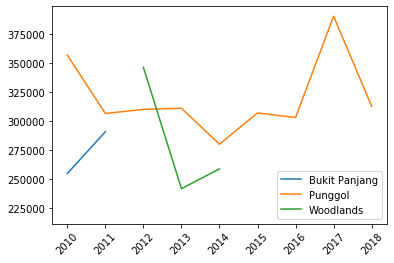

In [4]:
bto_data = bto_data[bto_data['max_price'] != -1]
bto_type = bto_data[(bto_data['types'] == '4-room')]
bto_bp = bto_data[(bto_data['town'] == 'Bukit Panjang')]
bto_pun = bto_data[(bto_data['town'] == 'Punggol')]
bto_wood = bto_data[(bto_data['town'] == 'Woodlands')]


years = np.arange(2010, 2020)  #2010 to 2019
bto_avgbp, bto_avgpun, bto_avgwood = [], [], []

for yr in years: #for 2010 to 2019
    #tmp = bto_bp[np.char.find(bto_bp['yr'], str(yr))]
    tmp = bto_bp[bto_bp['yr']== yr]
    bto_avgPrice = tmp['max_price'].mean()
    bto_avgbp.append(bto_avgPrice)
    
    tmp = bto_pun[bto_pun['yr']== yr]
    bto_avgPrice = tmp['max_price'].mean()
    bto_avgpun.append(bto_avgPrice)
    
    tmp = bto_wood[bto_wood['yr']== yr]
    bto_avgPrice = tmp['max_price'].mean()
    bto_avgwood.append(bto_avgPrice)

    
loc = np.arange(len(years))
plt.xticks(loc, years, rotation=45)
plt.plot(bto_avgbp,label="Bukit Panjang")
plt.plot(bto_avgpun, label="Punggol")
plt.plot(bto_avgwood, label="Woodlands")
plt.legend()
plt.show()

In [5]:
bto_data = bto_data[bto_data['min_price'] != -1]
bto_type = bto_data[(bto_data['types'] == '4-room')]
bto_bp = bto_data[(bto_data['town'] == 'Bukit Panjang')]
bto_pun = bto_data[(bto_data['town'] == 'Punggol')]
bto_wood = bto_data[(bto_data['town'] == 'Woodlands')]


years = np.arange(2010, 2020)  #2010 to 2019
bto_avgbp, bto_avgpun, bto_avgwood = [], [], []

for yr in years: #for 2010 to 2019
    tmp = bto_bp[np.char.find(bto_bp['yr'], str(yr))]
    bto_avgPrice = tmp['max_price'].mean()
    bto_avgbp.append(bto_avgPrice)
    
    tmp = bto_pun[np.char.find(bto_pun['yr'], str(yr))]
    bto_avgPrice = tmp['max_price'].mean()
    bto_avgpun.append(bto_avgPrice)
    
    tmp = bto_wood[np.char.find(bto_wood['yr'], str(yr))]
    bto_avgPrice = tmp['max_price'].mean()
    bto_avgwood.append(bto_avgPrice)
    
w = 0.3
loc1 = np.arange(len(years))
loc2 = loc1+w
loc3 = loc2+w
plt.figure(figsize=(19,9))
plt.xticks(loc1 + w/2, years, rotation=45)
plt.bar(loc1,bto_avgbp,width=w,label="Bukit Panjang")
plt.bar(loc2,bto_avgpun, width=w,label="Punggol")
plt.bar(loc3,bto_avgwood, width=w,label="Woodlands")
fig.tight_layout()
plt.legend()


TypeError: string operation on non-string array

In [6]:
resale = "median-resale-prices-for-registered-applications-by-town-and-flat-type.csv"

resale_data = np.genfromtxt(resale, delimiter=',', skip_header=True,
                  dtype=[('qtr', 'U10'),('town', 'U30'),('types','U20'),('price','i4')])
print(resale_data)

[('2010-Q1', 'Ang Mo Kio', '1-room',     -1)
 ('2010-Q1', 'Ang Mo Kio', '2-room',     -1)
 ('2010-Q1', 'Ang Mo Kio', '3-room', 278000) ...
 ('2020-Q2', 'YISHUN', '4-ROOM', 379000)
 ('2020-Q2', 'YISHUN', '5-ROOM', 485000)
 ('2020-Q2', 'YISHUN', 'EXEC',     -1)]


In [7]:
#Understanding your resale - dataset - Number of unique values
no_of_years = (len(np.unique(resale_data['qtr'])))/4
years = np.unique(resale_data['qtr'])    
print("There are total number of {} years of data".format(no_of_years))

town = np.unique(np.char.capitalize(resale_data['town']))
print ("\n{} town areas available for for sale in the past {} years".format(town, no_of_years))

types = np.unique(np.char.capitalize(resale_data['types']))
print ("\n{} are the type of flats available for for sale in the past {} years".format(types, no_of_years))


There are total number of 10.5 years of data

['Ang mo kio' 'Bedok' 'Bishan' 'Bukit batok' 'Bukit merah' 'Bukit panjang'
 'Bukit timah' 'Central' 'Central area' 'Choa chu kang' 'Clementi'
 'Geylang' 'Hougang' 'Jurong east' 'Jurong west' 'Kallang/whampoa'
 'Marine parade' 'Pasir ris' 'Punggol' 'Queenstown' 'Sembawang' 'Sengkang'
 'Serangoon' 'Tampines' 'Toa payoh' 'Woodlands' 'Yishun'] town areas available for for sale in the past 10.5 years

['1-room' '2-room' '3-room' '4-room' '5-room' 'Exec' 'Executive'] are the type of flats available for for sale in the past 10.5 years


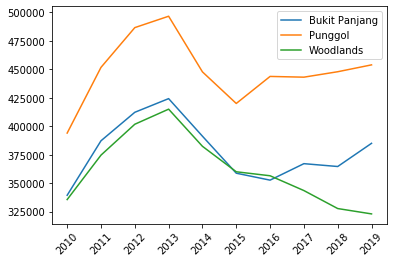

In [8]:
resale_data = resale_data[resale_data['price'] != -1] #remove rows with missing prices
resale_data = resale_data[(resale_data['types'] == '4-room')]
resale_bp = resale_data[(resale_data['town'] == 'Bukit Panjang')]
resale_pun = resale_data[(resale_data['town'] == 'Punggol')]
resale_wood = resale_data[(resale_data['town'] == 'Woodlands')]

years = np.arange(2010, 2020)  #2010 to 2019
resale_avgbp, resale_avgpun, resale_avgwood = [], [], []
for yr in years: #for 2010 to 2019
    tmp = resale_bp[np.char.find(resale_bp['qtr'], str(yr)) > -1]
    resale_avgPrice = tmp['price'].mean()
    resale_avgbp.append(resale_avgPrice)
    
    tmp = resale_pun[np.char.find(resale_pun['qtr'], str(yr)) > -1]
    resale_avgPrice = tmp['price'].mean()
    resale_avgpun.append(resale_avgPrice)
    
    tmp = resale_wood[np.char.find(resale_wood['qtr'], str(yr)) > -1]
    resale_avgPrice = tmp['price'].mean()
    resale_avgwood.append(resale_avgPrice)
    
loc = np.arange(len(years))
plt.xticks(loc, years, rotation=45)
plt.plot(resale_avgbp,label="Bukit Panjang")
plt.plot(resale_avgpun, label="Punggol")
plt.plot(resale_avgwood, label="Woodlands")
plt.legend()
plt.show()

NameError: name 'fig' is not defined

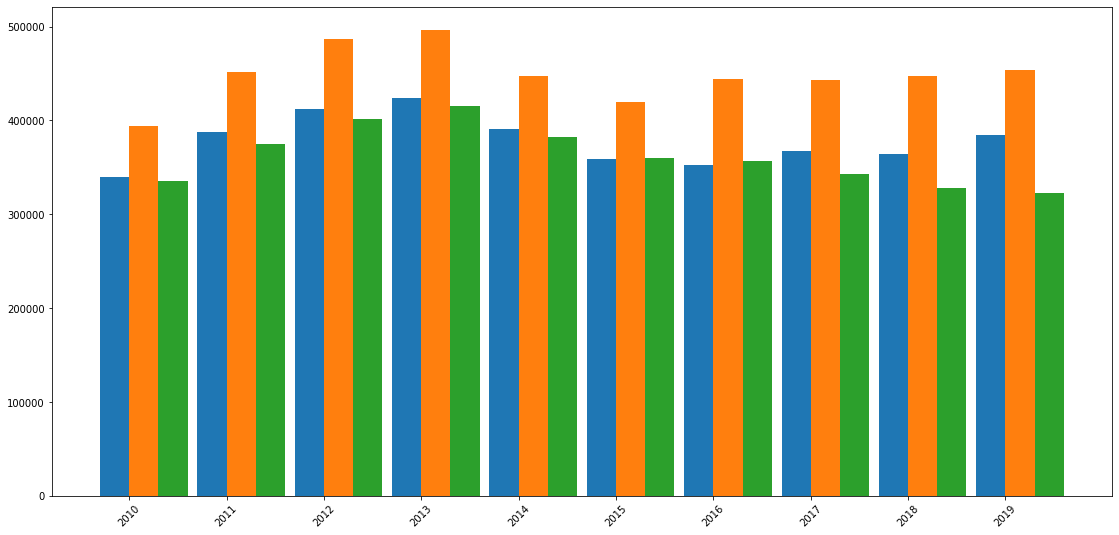

In [9]:
resale_data = resale_data[resale_data['price'] != -1] #remove rows with missing prices
resale_type = resale_data[(resale_data['types'] == '4-room')] 
resale_bp = resale_data[(resale_data['town'] == 'Bukit Panjang')]
resale_pun = resale_data[(resale_data['town'] == 'Punggol')]
resale_wood = resale_data[(resale_data['town'] == 'Woodlands')]

years = np.arange(2010, 2020)  #2010 to 2019
resale_avgbp, resale_avgpun, resale_avgwood = [], [], []
for yr in years: #for 2010 to 2019
    tmp = resale_bp[np.char.find(resale_bp['qtr'], str(yr)) > -1]
    resale_avgPrice = tmp['price'].mean()
    resale_avgbp.append(resale_avgPrice)
    
    tmp = resale_pun[np.char.find(resale_pun['qtr'], str(yr)) > -1]
    resale_avgPrice = tmp['price'].mean()
    resale_avgpun.append(resale_avgPrice)
    
    tmp = resale_wood[np.char.find(resale_wood['qtr'], str(yr)) > -1]
    resale_avgPrice = tmp['price'].mean()
    resale_avgwood.append(resale_avgPrice)
    
w = 0.3
loc1 = np.arange(len(years))
loc2 = loc1+w
loc3 = loc2+w
plt.figure(figsize=(19,9))
plt.xticks(loc1 + w/2, years, rotation=45)
plt.bar(loc1,resale_avgbp,width=w,label="Bukit Panjang")
plt.bar(loc2,resale_avgpun, width=w,label="Punggol")
plt.bar(loc3,resale_avgwood, width=w,label="Woodlands")
fig.tight_layout()
plt.legend()


In [10]:
#Comparision of Resale vs BTO 

bto_data = bto_data[bto_data['min_price'] != -1]
bto_type = bto_data[(bto_data['types'] == '4-room')]
bto_bp = bto_data[(bto_data['town'] == 'Bukit Panjang')]
bto_pun = bto_data[(bto_data['town'] == 'Punggol')]
bto_wood = bto_data[(bto_data['town'] == 'Woodlands')]


years = np.arange(2010, 2020)  #2010 to 2019
bto_avgbp, bto_avgpun, bto_avgwood = [], [], []

for yr in years: #for 2010 to 2019
    tmp = bto_bp[np.char.find(bto_bp['yr'], str(yr))]
    bto_avgPrice = tmp['max_price'].mean()
    bto_avgbp.append(bto_avgPrice)
    
    tmp = bto_pun[np.char.find(bto_pun['yr'], str(yr))]
    bto_avgPrice = tmp['max_price'].mean()
    bto_avgpun.append(bto_avgPrice)
    
    tmp = bto_wood[np.char.find(bto_wood['yr'], str(yr))]
    bto_avgPrice = tmp['max_price'].mean()
    bto_avgwood.append(bto_avgPrice)



resale_data = resale_data[resale_data['price'] != -1] #remove rows with missing prices
resale_type = resale_data[(resale_data['types'] == '4-room')] 
resale_bp = resale_data[(resale_data['town'] == 'Bukit Panjang')]
resale_pun = resale_data[(resale_data['town'] == 'Punggol')]
resale_wood = resale_data[(resale_data['town'] == 'Woodlands')]

years = np.arange(2010, 2020)  #2010 to 2019
resale_avgbp, resale_avgpun, resale_avgwood = [], [], []
for yr in years: #for 2010 to 2019
    tmp = resale_bp[np.char.find(resale_bp['qtr'], str(yr)) > -1]
    resale_avgPrice = tmp['price'].mean()
    resale_avgbp.append(resale_avgPrice)
    
    tmp = resale_pun[np.char.find(resale_pun['qtr'], str(yr)) > -1]
    resale_avgPrice = tmp['price'].mean()
    resale_avgpun.append(resale_avgPrice)
    
    tmp = resale_wood[np.char.find(resale_wood['qtr'], str(yr)) > -1]
    resale_avgPrice = tmp['price'].mean()
    resale_avgwood.append(resale_avgPrice)
    


loc = np.arange(len(years))
plt.figure(figsize=(19,9))
plt.xticks(loc, years, rotation=45)
plt.plot(resale_avgbp,label="Bukit Panjang_resale")
plt.plot(bto_avgbp,label="Bukit Panjang_bto")
plt.plot(resale_avgpun, label="Punggol_reslae")
plt.plot(bto_avgpun, label="Punggol_bto")
plt.plot(resale_avgwood, label="Woodlands_resale")
plt.plot(bto_avgwood, label="Woodlands_bto")
plt.legend()
plt.show()

TypeError: string operation on non-string array

In [11]:
past3years_data= np.genfromtxt('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv', delimiter=",", skip_header=True,
                      dtype = [('month','U10'), ('town','U30'),('types','U20'), ('block','i4'),('street_name','U20'),('storey_range','U10')
                              ,('floor_area_sqm','i4'),('flat_model','U30'),('lease_commence_date','i4'),('remaining_lease','U40'),('resale_price','i4')])

print(past3years_data)

[('2017-01', 'ANG MO KIO', '2 ROOM', 406, 'ANG MO KIO AVE 10', '10 TO 12',  44, 'Improved', 1979, '61 years 04 months', 232000)
 ('2017-01', 'ANG MO KIO', '3 ROOM', 108, 'ANG MO KIO AVE 4', '01 TO 03',  67, 'New Generation', 1978, '60 years 07 months', 250000)
 ('2017-01', 'ANG MO KIO', '3 ROOM', 602, 'ANG MO KIO AVE 5', '01 TO 03',  67, 'New Generation', 1980, '62 years 05 months', 262000)
 ...
 ('2020-11', 'YISHUN', 'EXECUTIVE', 877, 'YISHUN ST 81', '01 TO 03', 145, 'Maisonette', 1987, '66 years 01 month', 645000)
 ('2020-11', 'YISHUN', 'EXECUTIVE', 828, 'YISHUN ST 81', '07 TO 09', 145, 'Apartment', 1988, '66 years 03 months', 660000)
 ('2020-11', 'YISHUN', 'MULTI-GENERATION', 632, 'YISHUN ST 61', '07 TO 09', 159, 'Multi Generation', 1987, '66 years', 730000)]


In [12]:
no_of_years = (len(np.unique(past3years_data['month'])))/12
years = np.unique((past3years_data['month'][::5]))
print("There are total number of {:.2} years captured.".format(no_of_years))

town = np.unique(np.char.capitalize(past3years_data['town']))
print ("\n{} bto areas available for for sale in the past {:.2} years".format(town, no_of_years))

types = np.unique(np.char.capitalize(past3years_data['types']))
print ("\n{} are the type of flats available for for sale in the past {:.2} years".format(types, no_of_years))


avg_price = np.average(past3years_data['resale_price'])
print ("\n The average resale price for all resale-flats in the past {:.2} is ${:.2f}.".format(no_of_years, avg_price))



There are total number of 3.9 years captured.

['Ang mo kio' 'Bedok' 'Bishan' 'Bukit batok' 'Bukit merah' 'Bukit panjang'
 'Bukit timah' 'Central area' 'Choa chu kang' 'Clementi' 'Geylang'
 'Hougang' 'Jurong east' 'Jurong west' 'Kallang/whampoa' 'Marine parade'
 'Pasir ris' 'Punggol' 'Queenstown' 'Sembawang' 'Sengkang' 'Serangoon'
 'Tampines' 'Toa payoh' 'Woodlands' 'Yishun'] bto areas available for for sale in the past 3.9 years

['1 room' '2 room' '3 room' '4 room' '5 room' 'Executive'
 'Multi-generation'] are the type of flats available for for sale in the past 3.9 years

 The average resale price for all resale-flats in the past 3.9 is $441340.36.


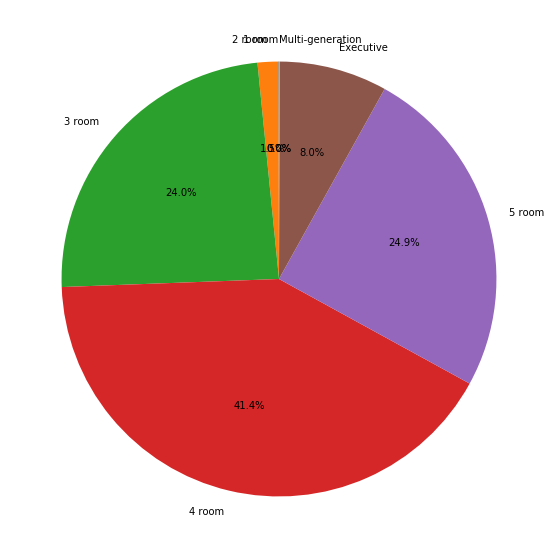

In [13]:
#Determine the type of the re-sale flats that was resgistered to be on sale in the past 3 years

a = np.array(np.char.capitalize(past3years_data['types']))
unique_elements, counts_elements = np.unique(a, return_counts=True)


labels = ['1 room','2 room','3 room' , '4 room', '5 room', 'Executive', 'Multi-generation'] 
sizes = (39, 1309, 20437, 35264, 21205, 6834, 41)

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) 
plt.show()


In [ ]:
#Avg Resale_price registerd for the past 3 years 

#for i in past3years_data['town']:
    #tmp = past3years_data[np.char.find(past3years_data['town']]
    #past3years_data = tmp['price'].sum()
    #bto_avgbp.append(bto_avgPrice)
                                       

                                       
for i in past3years_data['month']:
    month_breakdown =np.char.split(past3years_data['month'],"-")

In [ ]:
labels = ['Ang mo kio' 'Bedok' 'Bishan' 'Bukit batok' 'Bukit merah' 'Bukit panjang'
 'Bukit timah' 'Central area' 'Choa chu kang' 'Clementi' 'Geylang'
 'Hougang' 'Jurong east' 'Jurong west' 'Kallang/whampoa' 'Marine parade'
 'Pasir ris' 'Punggol' 'Queenstown' 'Sembawang' 'Sengkang' 'Serangoon'
 'Tampines' 'Toa payoh' 'Woodlands' 'Yishun']  
sizes = (3814, 4612, 1645, 3074, 3285, 3411, 230, 704, 3503, 1923, 2052, 4100, 1891, 6265, 2409, 501, 2604, 5546, 2285, 2177, 6879, 1699, 5587, 2774, 6255, 5904)


#Determine the town of the re-sale flats that was resgistered to be on sale in the past 3 years

b = np.array(np.char.capitalize(past3years_data['town']))
unique_elements, counts_elements = np.unique(b, return_counts=True)

fig, ax = plt.subplots()

ax.barh(unique_elements, counts_elements)
ax.set_yticks(unique_elements)
ax.set_yticklabels(unique_elements)

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total flats registerd for sales in the past 3 years')
fig.tight_layout()
plt.show()

In [ ]:
floor_sqm = past3years_data['floor_area_sqm']
past3_resale_price = past3years_data['resale_price']

x = past3years_data['floor_area_sqm']
y = past3years_data['resale_price']
plt.xlabel("Floor Area")
plt.ylabel("Resale Price")
colors = np.random.randint(1,100,len(x))
sizes = 10* np.random.randint(1,100,len(x))
plt.scatter(x, y, alpha=0.2)
colors = np.random.rand(N)
plt.colorbar()
